In [ ]:
import pandas as pd
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [ ]:
print(df.info())
print(df.describe())
print(df.head())
#print("\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [ ]:
df['Age_ffill'] = df['Age'].fillna(method='ffill')
df['Age_bfill'] = df['Age'].fillna(method='bfill')
print(df[['Age' , 'Age_ffill' , 'Age_bfill']])


      Age  Age_ffill  Age_bfill
0    22.0       22.0       22.0
1    38.0       38.0       38.0
2    26.0       26.0       26.0
3    35.0       35.0       35.0
4    35.0       35.0       35.0
..    ...        ...        ...
886  27.0       27.0       27.0
887  19.0       19.0       19.0
888   NaN       19.0       26.0
889  26.0       26.0       26.0
890  32.0       32.0       32.0

[891 rows x 3 columns]


/tmp/ipython-input-13-737837414.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age_ffill'] = df['Age'].fillna(method='ffill')
/tmp/ipython-input-13-737837414.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age_bfill'] = df['Age'].fillna(method='bfill')


In [ ]:
df['Cabin'] = df['Cabin'].fillna(value = 'unknown', limit = 5)
print(df['Cabin'])

0      unknown
1          C85
2      unknown
3         C123
4      unknown
        ...   
886        NaN
887        B42
888        NaN
889       C148
890        NaN
Name: Cabin, Length: 891, dtype: object


In [ ]:
df.drop_duplicates(inplace=True)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
print("\n",df.isnull().sum())


 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])

print(df[['Sex', 'Sex_encoded']].head())


      Sex  Sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

print(df[['Fare', 'Fare_scaled']].head())


      Fare  Fare_scaled
0   7.2500    -0.502445
1  71.2833     0.786845
2   7.9250    -0.488854
3  53.1000     0.420730
4   8.0500    -0.486337


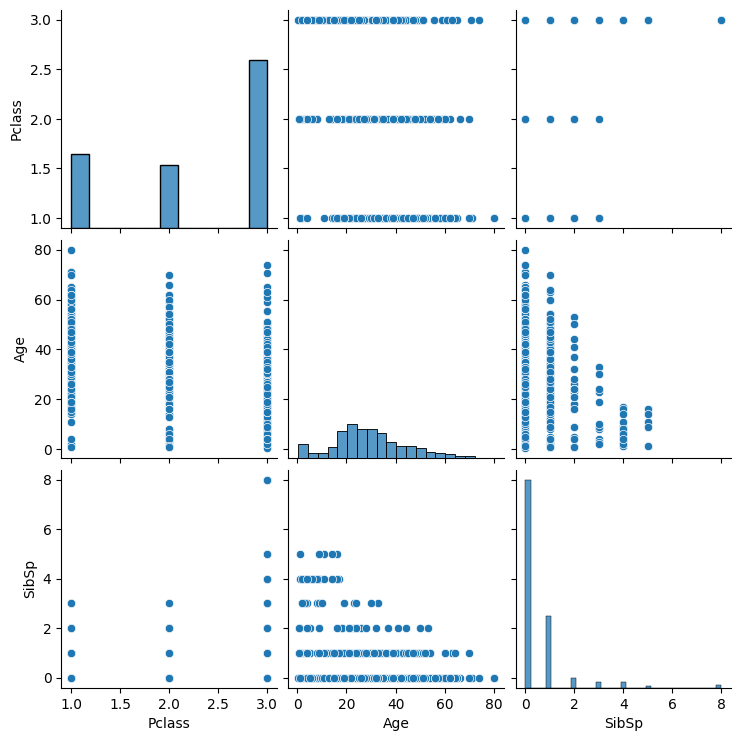

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Pclass', 'Sex', 'Age', 'SibSp']])
plt.show()


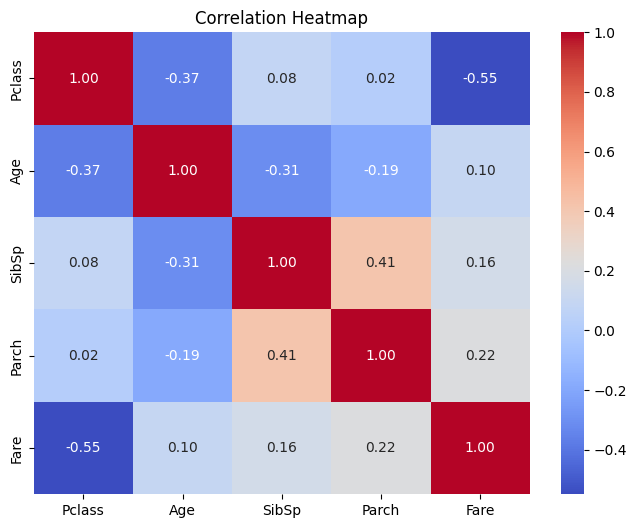

In [ ]:
corr = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
